# Análisis de sentimientos

**Función de activación**: función limitadora o umbral, que modifica el valor resultado o impone un límite que se debe sobrepasar para poder decidir si pertenece a una clase, u otra. En un problema de clasficación multinomial cada clase puede tiene su propia función de activación.

**Vectores Quade**: vectores de coeficientes que se asignan a cada clase, cada uno de estos vectores representa la relación entre las variables.

**Sesgo**: es el intercepto, y cada clase tiene el suyo.

**Función softmax**: es una generalización de la función sigmoide de la regresión logística simple y entrega una probabilidad de pertenencia a cada una de las clases para cada observación. Posteriormente se realiza una predicció de clase con la mayor probabilidad asociada mediante el uso de una función conocida como AMAX que selecciona esta mayor probabilidad.

Realizar un análisis de sentimientos requiere de tener una bbdd de inputs ya etiquetados.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_excel('BBDD.xlsx')
df

,review_en,review_es,sentiment,sentimiento
0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo
...,...,...,...,...
49995,I thought this movie did a down right good job...,Pensé que esta película hizo un buen trabajo a...,positive,positivo
49996,"Bad plot, bad dialogue, bad acting, idiotic di...","Mala parcela, mal diálogo, mala actuación, dir...",negative,negativo
49997,I am a Catholic taught in parochial elementary...,Soy católica enseñada en escuelas primarias pa...,negative,negativo
49998,I'm going to have to disagree with the previou...,Voy a tener que estar en desacuerdo con el com...,negative,negativo


In [5]:
df = df[['review_es', 'sentimiento']].copy()
df

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,Voy a tener que estar en desacuerdo con el com...,negativo


<Axes: >

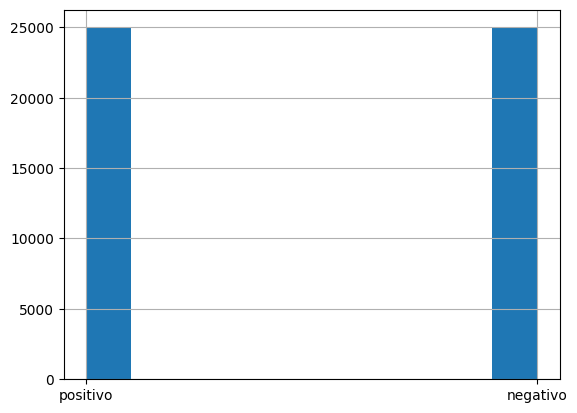

In [6]:
df['sentimiento'].hist()

In [7]:
df['target'] = df['sentimiento'].map({'positivo': 1, 'negativo': 0})
df

,review_es,sentimiento,target
0,Uno de los otros críticos ha mencionado que de...,positivo,1
1,Una pequeña pequeña producción.La técnica de f...,positivo,1
2,Pensé que esta era una manera maravillosa de p...,positivo,1
3,"Básicamente, hay una familia donde un niño peq...",negativo,0
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,1
...,...,...,...
49995,Pensé que esta película hizo un buen trabajo a...,positivo,1
49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo,0
49997,Soy católica enseñada en escuelas primarias pa...,negativo,0
49998,Voy a tener que estar en desacuerdo con el com...,negativo,0


In [8]:
df_train, df_test = train_test_split(df)

In [9]:
print(len(df_train))
print(len(df_test))

37500
12500


In [10]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['review_es'])
X_train

<37500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 3460239 stored elements in Compressed Sparse Row format>

In [11]:
X_test = vectorizer.fit_transform(df_test['review_es'])
X_test

<12500x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 1159951 stored elements in Compressed Sparse Row format>

In [12]:
Y_train = df_train['target']
Y_test = df_test['target']

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print('Train acc:', model.score(X_train, Y_train))
print('Test acc:', model.score(X_test, Y_test))

Train acc: 0.8788533333333334
Test acc: 0.6224


In [14]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [15]:
cm_train = confusion_matrix(Y_train, P_train, normalize= 'true')
cm_train

array([[0.86833387, 0.13166613],
       [0.11066752, 0.88933248]])

In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

cm_train = confusion_matrix(Y_train, P_train, normalize= 'true')
cm_test = confusion_matrix(Y_test, P_test, normalize= 'true')

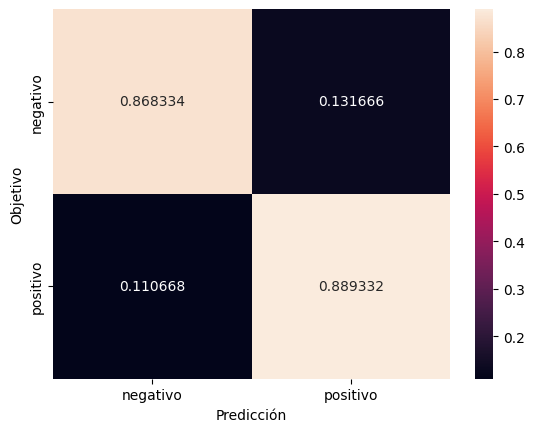

In [16]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel ("Predicción")
    ax.set_ylabel("Objetivo")
plot_cm(cm_train)

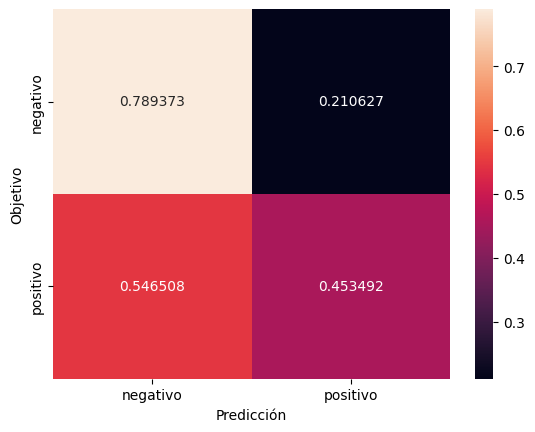

In [17]:
cm_test = confusion_matrix(Y_test, P_test, normalize= 'true')
plot_cm(cm_test)

In [18]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'fui': 784,
 'ver': 1907,
 'noche': 1249,
 'debido': 442,
 'al': 67,
 'elenco': 574,
 'había': 845,
 'ido': 924,
 'la': 1025,
 'habitación': 838,
 'de': 436,
 'por': 1433,
 'esa': 622,
 'razón': 1531,
 'película': 1361,
 'que': 1511,
 'ofrece': 1294,
 'también': 1750,
 'cada': 240,
 'minuto': 1159,
 'lo': 1067,
 'mismo': 1168,
 'para': 1334,
 'el': 570,
 'pesar': 1395,
 'era': 616,
 'mi': 1151,
 'sentimiento': 1640,
 'fue': 777,
 'cualquier': 407,
 'cosa': 384,
 'actuaciones': 38,
 'menos': 1144,
 'tan': 1752,
 'buenos': 228,
 'en': 584,
 'cambio': 251,
 'encontré': 593,
 'veces': 1900,
 'incluso': 945,
 'los': 1078,
 'mejores': 1140,
 'actores': 35,
 'no': 1248,
 'pueden': 1499,
 'una': 1870,
 'un': 1869,
 'material': 1127,
 'verdaderamente': 1911,
 'ahora': 64,
 'tenía': 1774,
 'ningún': 1241,
 'problema': 1466,
 'con': 352,
 'forma': 765,
 'se': 1615,
 'hecho': 868,
 'las': 1031,
 'películas': 1362,
 'lado': 1026,
 'otro': 1317,
 'tiempo': 1804,
 'contar': 364,
 'historia': 892,
 '

In [19]:
model.coef_[0]

array([-0.75867393,  1.63124577,  0.34490284, ...,  0.12715831,
       -1.25877977, -2.19256838])

In [20]:
corte = 4

print('Palabras más positivas:')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > corte:
        print(word, weight)

Palabras más positivas:
gran 4.064651113494436
hijo 4.209954445914848
personajes 4.5220371242010415
recomiendo 4.326252037104181
generalmente 4.044838091789848
dispara 4.257008903520199
dejar 4.439369500082198
excepcional 4.601257371187005
maravillosamente 4.513434888824697
incluye 4.374368153338751
mencionar 4.067623938943414
excelentes 8.260608336877093
how 4.823953533585601
encima 4.755892166074748
both 4.009905208124857


In [21]:
print('Palabras más negativas:')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -corte:
        print(word, weight)

Palabras más negativas:
perdido -10.354086515919555
decepción -4.758555052838788
decir -5.0513829357009365
absoluto -6.548206708902461
aburrida -6.8229187395272195
mala -5.512266020486526
hora -8.98600892435379
desarrolla -4.809818939029614
barato -4.9133069425736835
perdió -7.601334407084561
podemos -5.435371604824708
mismas -4.004019026792686
nosotros -4.079048902582655
estúpido -4.3068662218460885
malas -7.057338786033313
merece -4.109951631657327
than -7.235870457777902


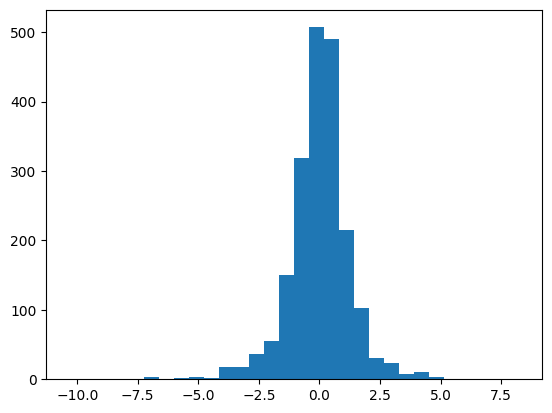

In [22]:
plt.hist(model.coef_[0], bins=30);

In [23]:
prueba = ["estuvo muy entretenida la película", "estuvo terrible la película, me aburrí mucho", "no la recomiendo"]

# Transformar la entrada con el vectorizador
x = vectorizer.transform(prueba)

In [24]:
# Predecir con el modelo
P = model.predict(x)
P

array([1, 1, 1], dtype=int64)

In [25]:
# Obtener las clases del modelo
clases = model.classes_

In [26]:
# Mostrar la clase predicha
for i in range(len(prueba)):
    if clases[P_train[i]] == 0:
        print(f"El comentario: '{prueba[i]}' es: Negativo")
    else:
        print(f"El comentario: '{prueba[i]}' es: Positivo")

El comentario: 'estuvo muy entretenida la película' es: Positivo
El comentario: 'estuvo terrible la película, me aburrí mucho' es: Positivo
El comentario: 'no la recomiendo' es: Negativo


# Multiclase

In [52]:
df = pd.read_csv('Twitter_Data.csv')
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

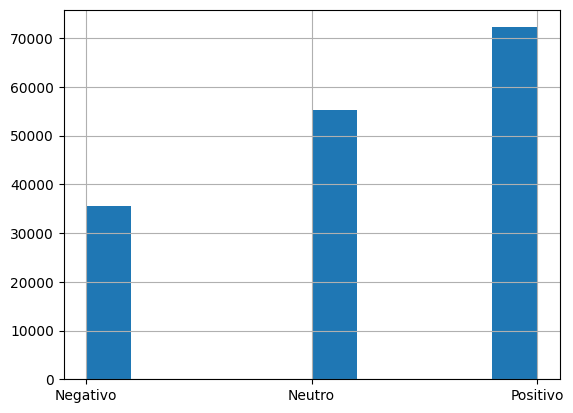

In [56]:
df['category'].hist()

In [60]:
df['target'] = df['category'].map({'Positivo': 1, 'Negativo': 0, 'Neutro': 2})
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


In [62]:
df_train, df_test = train_test_split(df)

In [64]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_test = vectorizer.transform(df_test['clean_text'])
Y_train = df_train['target']
Y_test = df_test['target']

In [70]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print('Train acc:', model.score(X_train, Y_train))
print('Test acc:', model.score(X_test, Y_test))

Train acc: 0.8970431823016379
Test acc: 0.8935251092238967


In [72]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

cm_train = confusion_matrix(Y_train, P_train, normalize= 'true')
cm_test = confusion_matrix(Y_test, P_test, normalize= 'true')

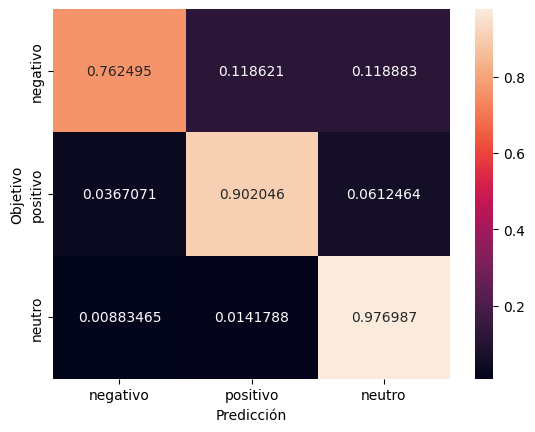

In [74]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel ("Predicción")
    ax.set_ylabel("Objetivo")
plot_cm(cm_train)

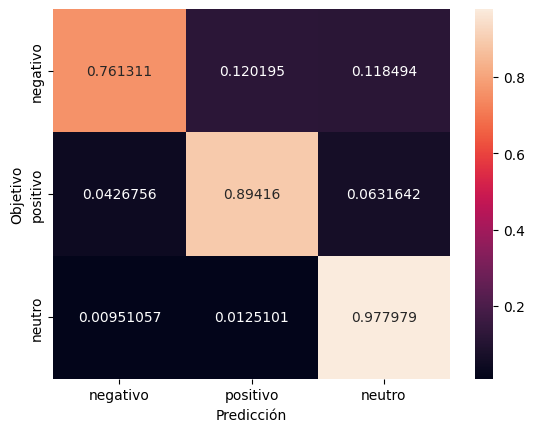

In [76]:
plot_cm(cm_test)